# Exercise 1 (Tutorial 3-4)

Dataset: https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment

Import libraries

In [2]:
# Ensure the openpyxl library is installed
# %pip install openpyxl
# %pip install spacy
# !python -m spacy download en_core_web_sm
# %pip install wordcloud

import pandas as pd
import nltk
import string
import re
import matplotlib.pyplot as plt
import os

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

# import spacy



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\azri2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\azri2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\azri2\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\azri2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\azri2\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Load dataset

In [ ]:
csv_path = 'Tweets.csv'
if not os.path.exists(csv_path):
	print(f"File not found: {csv_path}")
else:
	df = pd.read_csv(csv_path)


### Extracting Text Features

1. Sentence segmentation

In [4]:
df['sentences'] = df['text'].apply(lambda x: sent_tokenize(str(x)))
df[['text', 'sentences']].head()

,text,sentences
0,@VirginAmerica What @dhepburn said.,[@VirginAmerica What @dhepburn said.]
1,@VirginAmerica plus you've added commercials t...,[@VirginAmerica plus you've added commercials ...
2,@VirginAmerica I didn't today... Must mean I n...,[@VirginAmerica I didn't today... Must mean I ...
3,@VirginAmerica it's really aggressive to blast...,[@VirginAmerica it's really aggressive to blas...
4,@VirginAmerica and it's a really big bad thing...,[@VirginAmerica and it's a really big bad thin...


2. Tokenization

In [5]:
df['tokens'] = df['sentences'].apply(lambda sents: [word for sent in sents for word in word_tokenize(sent)])
df[['text', 'tokens']].head()


,text,tokens
0,@VirginAmerica What @dhepburn said.,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,@VirginAmerica plus you've added commercials t...,"[@, VirginAmerica, plus, you, 've, added, comm..."
2,@VirginAmerica I didn't today... Must mean I n...,"[@, VirginAmerica, I, did, n't, today, ..., Mu..."
3,@VirginAmerica it's really aggressive to blast...,"[@, VirginAmerica, it, 's, really, aggressive,..."
4,@VirginAmerica and it's a really big bad thing...,"[@, VirginAmerica, and, it, 's, a, really, big..."


3. Case folding (lowercase)

In [6]:
df['tokens_lower'] = df['tokens'].apply(lambda tokens: [word.lower() for word in tokens])
df[['text', 'tokens_lower']].head()


,text,tokens_lower
0,@VirginAmerica What @dhepburn said.,"[@, virginamerica, what, @, dhepburn, said, .]"
1,@VirginAmerica plus you've added commercials t...,"[@, virginamerica, plus, you, 've, added, comm..."
2,@VirginAmerica I didn't today... Must mean I n...,"[@, virginamerica, i, did, n't, today, ..., mu..."
3,@VirginAmerica it's really aggressive to blast...,"[@, virginamerica, it, 's, really, aggressive,..."
4,@VirginAmerica and it's a really big bad thing...,"[@, virginamerica, and, it, 's, a, really, big..."


4. Punctuation Removal

In [7]:
# Step 6: Punctuation removal
df['tokens_no_punct'] = df['tokens_lower'].apply(lambda tokens: [word for word in tokens if word.isalnum()])
df[['text', 'tokens_no_punct']].head()


,text,tokens_no_punct
0,@VirginAmerica What @dhepburn said.,"[virginamerica, what, dhepburn, said]"
1,@VirginAmerica plus you've added commercials t...,"[virginamerica, plus, you, added, commercials,..."
2,@VirginAmerica I didn't today... Must mean I n...,"[virginamerica, i, did, today, must, mean, i, ..."
3,@VirginAmerica it's really aggressive to blast...,"[virginamerica, it, really, aggressive, to, bl..."
4,@VirginAmerica and it's a really big bad thing...,"[virginamerica, and, it, a, really, big, bad, ..."


5. Stopword Removal

In [ ]:
stop_words = set(stopwords.words('english'))
df['tokens_no_stop'] = df['tokens_no_punct'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
df[['text', 'tokens_no_stop']].head()


,text,tokens_no_stop
0,@VirginAmerica What @dhepburn said.,"[virginamerica, dhepburn, said]"
1,@VirginAmerica plus you've added commercials t...,"[virginamerica, plus, added, commercials, expe..."
2,@VirginAmerica I didn't today... Must mean I n...,"[virginamerica, today, must, mean, need, take,..."
3,@VirginAmerica it's really aggressive to blast...,"[virginamerica, really, aggressive, blast, obn..."
4,@VirginAmerica and it's a really big bad thing...,"[virginamerica, really, big, bad, thing]"


6. Abbreviation expansion

In [ ]:
abbrev_dict = {
    "u": "you",
    "ur": "your",
    "r": "are",
    "pls": "please",
    "plz": "please",
    "btw": "by the way",
    "idk": "i don't know",
    "imo": "in my opinion",
    "omg": "oh my god",
    "lol": "laugh out loud",
    "rofl": "rolling on the floor laughing",
    "lmao": "laughing my ass off",
    "smh": "shaking my head",
    "thx": "thanks",
    "ty": "thank you",
    "np": "no problem",
    "omw": "on my way",
    "b4": "before",
    "gr8": "great",
    "k": "okay",
    "bc": "because",
    "b/c": "because",
    "w/": "with",
    "w/o": "without",
    "bday": "birthday",
    "msg": "message",
    "fyi": "for your information",
    "asap": "as soon as possible",
    "brb": "be right back",
    "gtg": "got to go",
    "ttyl": "talk to you later",
    "afaik": "as far as i know",
    "icymi": "in case you missed it",
    "tbh": "to be honest",
    "btw": "by the way",
    "im": "i am",
    "ive": "i have",
    "idc": "i don't care",
    "ikr": "i know right",
    "ya": "you",
    "ya'll": "you all",
    "sup": "what's up",
    "bff": "best friend forever",
    "bf": "boyfriend",
    "gf": "girlfriend"
}


In [10]:
df['tokens_expanded'] = df['tokens_no_stop'].apply(
    lambda tokens: [abbrev_dict.get(word, word) for word in tokens]
)
df[['text', 'tokens_expanded']].head()


,text,tokens_expanded
0,@VirginAmerica What @dhepburn said.,"[virginamerica, dhepburn, said]"
1,@VirginAmerica plus you've added commercials t...,"[virginamerica, plus, added, commercials, expe..."
2,@VirginAmerica I didn't today... Must mean I n...,"[virginamerica, today, must, mean, need, take,..."
3,@VirginAmerica it's really aggressive to blast...,"[virginamerica, really, aggressive, blast, obn..."
4,@VirginAmerica and it's a really big bad thing...,"[virginamerica, really, big, bad, thing]"


7. Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()
# Step B2: Apply lemmatization instead of stemming
df['lemmatized_tokens'] = df['tokens_expanded'].apply(
    lambda tokens: [lemmatizer.lemmatize(word) for word in tokens]
)
df[['text', 'lemmatized_tokens']].head()



,text,lemmatized_tokens
0,@VirginAmerica What @dhepburn said.,"[virginamerica, dhepburn, said]"
1,@VirginAmerica plus you've added commercials t...,"[virginamerica, plus, added, commercial, exper..."
2,@VirginAmerica I didn't today... Must mean I n...,"[virginamerica, today, must, mean, need, take,..."
3,@VirginAmerica it's really aggressive to blast...,"[virginamerica, really, aggressive, blast, obn..."
4,@VirginAmerica and it's a really big bad thing...,"[virginamerica, really, big, bad, thing]"


8. Part-of-speech tagging

In [ ]:
df['pos_tags_lemmatized'] = df['lemmatized_tokens'].apply(
    lambda tokens: nltk.pos_tag(tokens)
)

# Preview result
df[['text', 'lemmatized_tokens', 'pos_tags_lemmatized']].head()


,text,lemmatized_tokens,pos_tags_lemmatized
0,@VirginAmerica What @dhepburn said.,"[virginamerica, dhepburn, said]","[(virginamerica, NN), (dhepburn, NN), (said, V..."
1,@VirginAmerica plus you've added commercials t...,"[virginamerica, plus, added, commercial, exper...","[(virginamerica, NN), (plus, CC), (added, JJ),..."
2,@VirginAmerica I didn't today... Must mean I n...,"[virginamerica, today, must, mean, need, take,...","[(virginamerica, NN), (today, NN), (must, MD),..."
3,@VirginAmerica it's really aggressive to blast...,"[virginamerica, really, aggressive, blast, obn...","[(virginamerica, NNS), (really, RB), (aggressi..."
4,@VirginAmerica and it's a really big bad thing...,"[virginamerica, really, big, bad, thing]","[(virginamerica, NNS), (really, RB), (big, JJ)..."


# Exercise 2 (Tutorial 8-9)

1. Word Cloud Generation

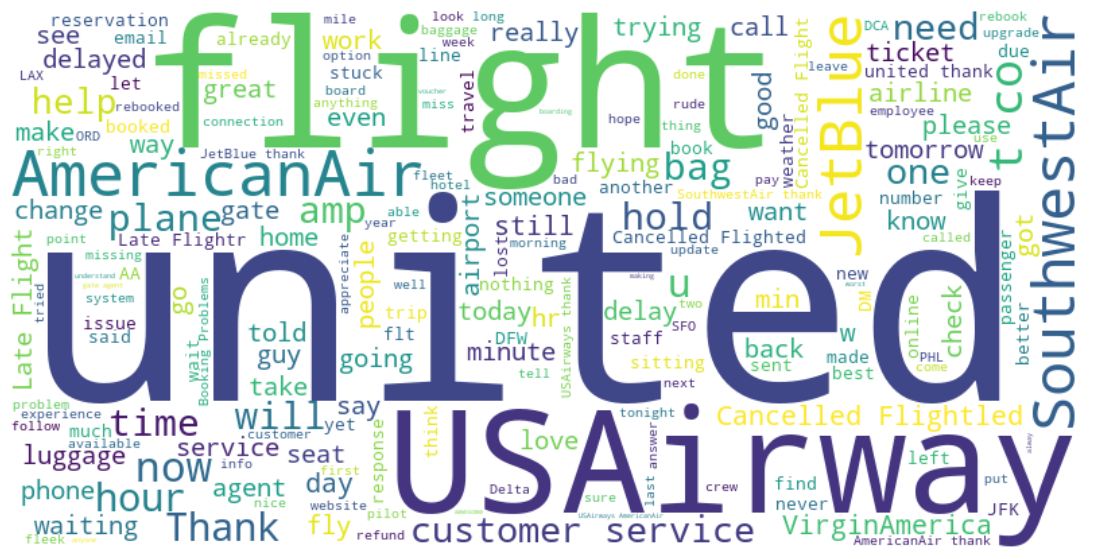

In [ ]:
# Combine all text into one string
all_text = ' '.join(df['text'].dropna().tolist())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


2. Named Entity Recognition (NER) using spaCy

In [ ]:
# Clean text: lowercase + remove punctuation (but keep as full sentence)
df['cleaned_text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x).lower()))

# Preview cleaned text
df[['text', 'cleaned_text']].head()


,text,cleaned_text
0,@VirginAmerica What @dhepburn said.,virginamerica what dhepburn said
1,@VirginAmerica plus you've added commercials t...,virginamerica plus youve added commercials to ...
2,@VirginAmerica I didn't today... Must mean I n...,virginamerica i didnt today must mean i need t...
3,@VirginAmerica it's really aggressive to blast...,virginamerica its really aggressive to blast o...
4,@VirginAmerica and it's a really big bad thing...,virginamerica and its a really big bad thing a...


In [15]:
import spacy

# Load spaCy English model
nlp = spacy.load('en_core_web_sm')

# Apply NER
df['entities_cleaned'] = df['cleaned_text'].apply(lambda x: [(ent.text, ent.label_) for ent in nlp(x).ents])

# Preview entities
df[['cleaned_text', 'entities_cleaned']].head()


,cleaned_text,entities_cleaned
0,virginamerica what dhepburn said,[]
1,virginamerica plus youve added commercials to ...,[]
2,virginamerica i didnt today must mean i need t...,"[(today, DATE)]"
3,virginamerica its really aggressive to blast o...,[]
4,virginamerica and its a really big bad thing a...,[]


3. Word Sense Disambiguation (WSD)

In [ ]:
import nltk
from nltk.wsd import lesk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Filter for tweets containing 'delay'
ambiguous_word = 'delay'
sample = df[df['text'].str.contains(ambiguous_word, case=False, na=False)].copy()

# Preview some examples
sample[['text']].head(3)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\azri2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\azri2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\azri2\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,text
82,@VirginAmerica you're the best!! Whenever I (b...
115,@VirginAmerica should I be concerned that I am...
119,@VirginAmerica Love the team running Gate E9 a...


In [17]:
def disambiguate_meaning(sentence, target_word):
    tokens = word_tokenize(sentence)
    sense = lesk(tokens, target_word)
    if sense:
        return sense.definition()
    else:
        return "No sense found"

# Apply to a few examples (e.g., first 5)
sample['wsd_meaning'] = sample['text'].apply(lambda x: disambiguate_meaning(x, ambiguous_word))

# View results
sample[['text', 'wsd_meaning']].head(5)


,text,wsd_meaning
82,@VirginAmerica you're the best!! Whenever I (b...,cause to be slowed down or delayed
115,@VirginAmerica should I be concerned that I am...,cause to be slowed down or delayed
119,@VirginAmerica Love the team running Gate E9 a...,the act of delaying; inactivity resulting in s...
122,@VirginAmerica I like the customer service but...,the act of delaying; inactivity resulting in s...
134,@VirginAmerica Another delayed flight? #liking...,cause to be slowed down or delayed


4. Sentence Sentiment Classification

In [ ]:
# %pip install textblob
from textblob import TextBlob

# Apply sentence-level sentiment
df['blob'] = df['cleaned_text'].apply(TextBlob)

df['sentence_sentiment'] = df['blob'].apply(lambda x: x.sentiment.polarity)
df['sentence_subjectivity'] = df['blob'].apply(lambda x: x.sentiment.subjectivity)

# Add sentiment label
def sentiment_label(p):
    if p > 0: return 'Positive'
    elif p < 0: return 'Negative'
    else: return 'Neutral'

df['sentence_label'] = df['sentence_sentiment'].apply(sentiment_label)

df[['cleaned_text', 'sentence_sentiment', 'sentence_label']].head(5)


,cleaned_text,sentence_sentiment,sentence_label
0,virginamerica what dhepburn said,0.00000,Neutral
1,virginamerica plus youve added commercials to ...,0.00000,Neutral
2,virginamerica i didnt today must mean i need t...,-0.31250,Negative
3,virginamerica its really aggressive to blast o...,0.00625,Positive
4,virginamerica and its a really big bad thing a...,-0.35000,Negative


5. Sentiment Lexicon

In [19]:
# Step 16: Sentiment lexicon
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

vader = SentimentIntensityAnalyzer()

# Apply VADER
df['vader_scores'] = df['cleaned_text'].apply(vader.polarity_scores)
df['vader_compound'] = df['vader_scores'].apply(lambda x: x['compound'])

# Label from VADER compound score
def vader_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['vader_label'] = df['vader_compound'].apply(vader_label)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\azri2\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [20]:
pd.set_option('display.max_colwidth', None)
df[['cleaned_text', 'vader_compound', 'vader_label', 'vader_scores']].head(5)


,cleaned_text,vader_compound,vader_label,vader_scores
0,virginamerica what dhepburn said,0.0000,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
1,virginamerica plus youve added commercials to the experience tacky,0.0000,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
2,virginamerica i didnt today must mean i need to take another trip,0.0000,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
3,virginamerica its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse,-0.2716,Negative,"{'neg': 0.226, 'neu': 0.645, 'pos': 0.129, 'compound': -0.2716}"
4,virginamerica and its a really big bad thing about it,-0.5829,Negative,"{'neg': 0.321, 'neu': 0.679, 'pos': 0.0, 'compound': -0.5829}"


6. Polarity & Sentiment Strength

TextBlob vs VADER comparison

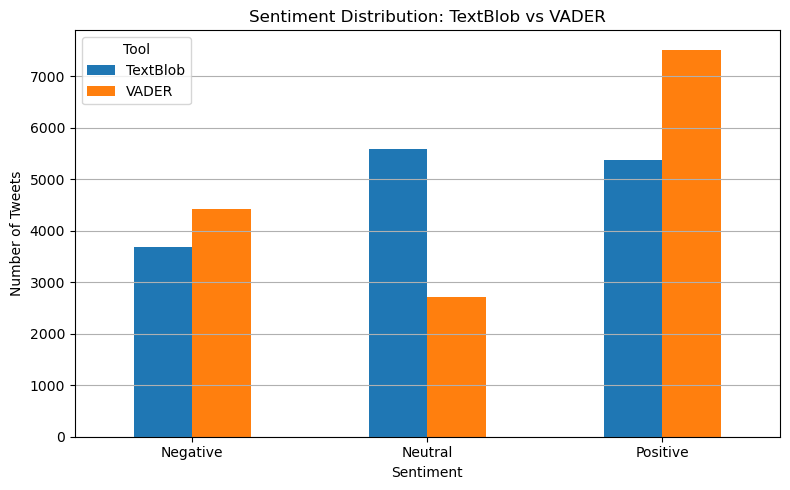

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count sentiment labels
textblob_counts = df['sentence_label'].value_counts().sort_index()
vader_counts = df['vader_label'].value_counts().sort_index()

# Combine into one DataFrame
sentiment_compare = pd.DataFrame({
    'TextBlob': textblob_counts,
    'VADER': vader_counts
})

# Plot
sentiment_compare.plot(kind='bar', figsize=(8, 5), color=['#1f77b4', '#ff7f0e'])
plt.title('Sentiment Distribution: TextBlob vs VADER')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Tool')
plt.tight_layout()
plt.show()


## 1. Sentiment Distribution (Bar Chart)

| Sentiment | TextBlob Count | VADER Count | Observation                                                                                                            |
| --------- | -------------- | ----------- | ---------------------------------------------------------------------------------------------------------------------- |
| Negative  | \~3,700        | \~4,400     | VADER flags **more negatives** — it’s stricter, especially on short, sharp tweets.                                     |
| Neutral   | \~5,600        | \~2,700     | TextBlob assigns **more neutrals**, likely because it’s conservative with assigning polarity.                          |
| Positive  | \~5,300        | \~7,500     | VADER detects more **positive tweets**, especially from positive expressions like "awesome", "thanks", "love it", etc. |

**Takeaway**:

* **VADER** is more sensitive to **emotional language**, especially on social media (slang, sarcasm, emphasis).
* **TextBlob** is more balanced but tends to produce more **neutral** labels.


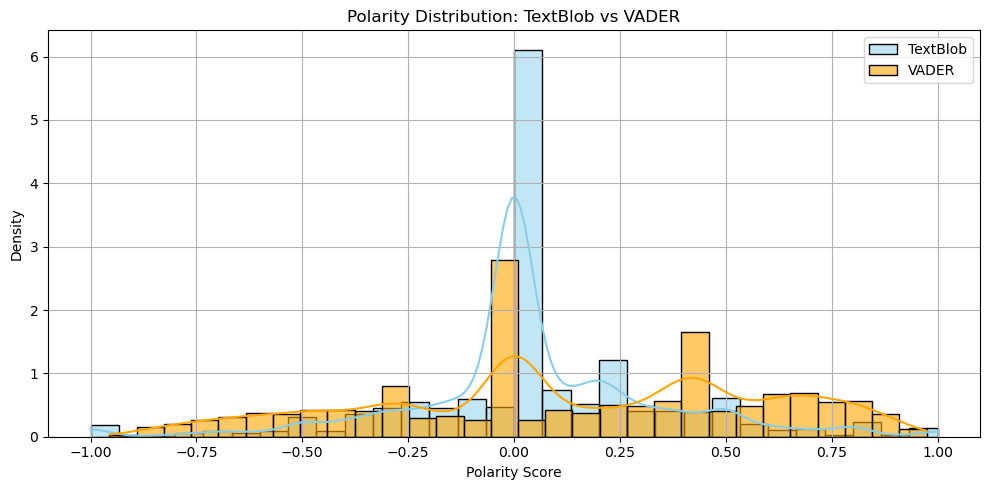

In [22]:
plt.figure(figsize=(10, 5))

# TextBlob polarity
sns.histplot(df['sentence_sentiment'], bins=30, kde=True, color='skyblue', label='TextBlob', stat='density')

# VADER compound
sns.histplot(df['vader_compound'], bins=30, kde=True, color='orange', label='VADER', stat='density', alpha=0.6)

plt.title('Polarity Distribution: TextBlob vs VADER')
plt.xlabel('Polarity Score')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## 2. Polarity Distribution (Histogram)

* **TextBlob (blue)**:

  * Very sharp peak around **0.0** → conservative in scoring polarity.
  * Smooth curve → slightly less expressive for strong emotions.

* **VADER (orange)**:

  * Broader distribution.
  * More samples at high **positive** (0.5 to 1.0) and high **negative** (-0.5 to -1.0).
  * Lower peak at 0 → less neutral, more decisive.

🔍 **Takeaway**:

* VADER's **sentiment strength** has **higher variance**, making it better for detecting **strong opinions** (great for tweets).
* TextBlob is good for **general tone**, but may underplay extremes.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t